✅ Accuracy: 100.00%

🔍 Classification Report:
                  precision    recall  f1-score   support

gateway-of-india      1.000     1.000     1.000         4
   mysore-palace      1.000     1.000     1.000         5
     qutub-minar      1.000     1.000     1.000         3
       taj-mahal      1.000     1.000     1.000         6

        accuracy                          1.000        18
       macro avg      1.000     1.000     1.000        18
    weighted avg      1.000     1.000     1.000        18



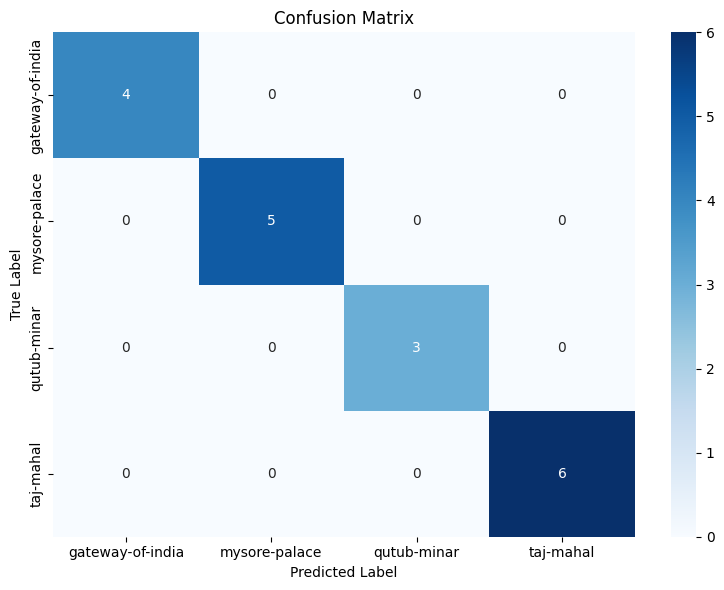

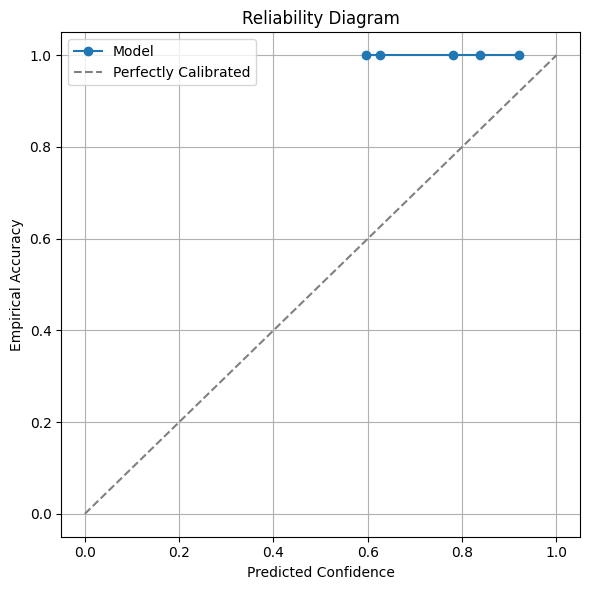

In [2]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, 
    precision_recall_fscore_support, 
    classification_report,
    confusion_matrix
)
from sklearn.calibration import calibration_curve

# 📂 Load CSV files
pred_df = pd.read_csv("AI/hybrid_model/results/predictions.csv")
gt_df = pd.read_csv("AI/hybrid_model/results/ground_truth.csv")

# 🔗 Merge on image_name
merged = pd.merge(gt_df, pred_df, on="image_name")
y_true = merged["true_label"]
y_pred = merged["predicted_label"]
conf = merged["confidence"]

# ✅ Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

# 📊 Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_true, y_pred, digits=3))

# 🔲 Confusion Matrix
labels = sorted(y_true.unique())
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

# 📉 Reliability Curve (Calibration Plot)
correct = (y_true == y_pred).astype(int)
prob_true, prob_pred = calibration_curve(correct, conf, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel("Predicted Confidence")
plt.ylabel("Empirical Accuracy")
plt.title("Reliability Diagram")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("reliability_diagram.png")
plt.show()
